MỤC TIÊU: Hỗ trợ doanh nghiệp phát triển sản phẩm dựa trên từng phân khúc khách hàng, đưa ra giải pháp marketing cho từng phân khúc khách hàng tại từng khu vực dựa trên kết quả phân tích và kiến thức về kinh doanh.

CÁC BƯỚC THỰC HIỆN: Thực hiện phân tích dựa trên 6 bước trong phân tích dữ liệu: ASK, PREPARE, PROCESS, ANALYZE, SHARE, ACT

# ASK

Từ bộ dữ liệu sẵn có đưa ra được các chiến lược cho doanh nghiệp nhằm giữ chân các khách hàng thân thiết (khách hàng hạng vàng) và đưa ra các giải pháp gắn kết hơn với các khách hàng hạng bạc nhằm nâng hạng các khách hạng bạc lên vàng. Còn  đối với các khách hàng hạng đồng đưa ra được các giải pháp làm cho khách hàng quay lại với doanh nghiệp, tích cực hơn với nhóm khách hàng này nhằm tạo ấn tượng tốt để khách hàng tin tưởng hơn.

# PREPARE

Chuẩn bị dữ liệu:
1. Import các thư viện cần thiết
2. Đọc dữ liệu từ file CSV

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import warnings
import os
import datetime as dt
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/Auto Sales data.csv')

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


Dữ liệu bao gồm các thông tin chi tiết về doanh thu và doanh số bán hàng, hóa đơn bán hàng và giá trị của mỗi đơn hàng. Dựa trên số liệu giao dịch bán lẻ từ ngày đến ngày

DATA DICTIONARY:

*   ORDERNUMBER: Mã đơn hàng
*   QUANTITYORDERED: Tổng sản phẩm trong đơn hàng
*   PRICEEACH: Gía mỗi sản phẩm
*   SALES: Tổng giá trị hóa đơn
*   ORDERDATE: Ngày mua hàng
*   DAY_SINCE_LAST_ORDER: Ngày mua hàng gần nhất kể từ ngày xuất dữ liệu
*   STATUS: Trạng thái
*   PRODUCTLINE: Dòng sản phẩm
*   PRODUCTCODE: Mã sản phẩm
*   CUSTOMERNAME: Tên khách hàng
*   PHONE: Số điện thoại
*   CITY: Thành phố
*   COUNTRY: Khu vực
*   DEALSIZE: Quy mô của từng đơn hàng













# PROCESS: Exploratory Data Analysis

Tiền xử lý dữ liệu:

1.   Kiểm tra kiểu dữ liệu
2.   Xác định số hàng, số cột
3.   Xử lý dữ liệu bị khuyết thiếu, giá trị null, duplicate,...
4.   Xử lý dữ liệu ngoại lai

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
df.shape

(2747, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
count,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000
mean,10259.761558,35.103021,101.098952,6.491081,3553.047583,1757.085912,100.691664
std,91.877521,9.762135,42.042549,4.230544,1838.953901,819.280576,40.114802
min,10100.000000,6.000000,26.880000,1.000000,482.130000,42.000000,33.000000
25%,10181.000000,27.000000,68.745000,3.000000,2204.350000,1077.000000,68.000000
50%,10264.000000,35.000000,95.550000,6.000000,3184.800000,1761.000000,99.000000
75%,10334.500000,43.000000,127.100000,9.000000,4503.095000,2436.500000,124.000000
max,10425.000000,97.000000,252.870000,18.000000,14082.800000,3562.000000,214.000000


In [ ]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

# ANALYZE

Phân tích và phân khúc khách hàng dựa trên mô hình RFM

Mô hình RFM Cho phép phân khúc khách hàng dựa trên tần suất mua hàng và giá trị mua hàng và cũng giúp xác định khách hàng chi nhiều tiền nhất
*   RECENCY: Thời gian kể từ lần mua hàng gần nhất
*   FREQUENCY: Tần suất khách hàng mua hàng
*   MONETARY: Tổng giá trị mua hàng của khách hàng

## Phân tích sơ bộ

In [ ]:
df_country = df.groupby('COUNTRY').size()
df_country

COUNTRY
Australia      185
Austria         55
Belgium         33
Canada          70
Denmark         63
Finland         92
France         314
Germany         62
Ireland         16
Italy          113
Japan           52
Norway          85
Philippines     26
Singapore       79
Spain          342
Sweden          57
Switzerland     31
UK             144
USA            928
dtype: int64

In [ ]:
df_country = pd.DataFrame(df_country)
df_country

,0
COUNTRY,
Australia,185
Austria,55
Belgium,33
Canada,70
Denmark,63
Finland,92
France,314
Germany,62
Ireland,16


In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Australia to USA
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       19 non-null     int64
dtypes: int64(1)
memory usage: 860.0+ bytes


In [ ]:
df_country = df_country.reset_index()

In [ ]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COUNTRY  19 non-null     object
 1   0        19 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


In [ ]:
print(df_country.columns) #0 KHÔNG PHẢI LÀ TÊN CỘT

Index(['COUNTRY', 0], dtype='object')


In [ ]:
df_country = df_country.rename(columns={0:'VALUES'})

In [ ]:
df_country = df_country.sort_values(by='VALUES',ascending=False).reset_index()

In [ ]:
print(df['SALES'].dtype)

float64


In [ ]:
df_country_sales = df.groupby(by='COUNTRY').agg({'SALES': 'sum'})
df_country_sales = df_country_sales.sort_values(by='SALES',ascending=False).reset_index()
# sắp xếp lại
# mức chi tiêu từng khu vực

In [ ]:
df_dealsize = df.groupby('DEALSIZE').size()
df_dealsize = pd.DataFrame(df_dealsize)
df_dealsize = df_dealsize.reset_index()
df_dealsize.info()
lbls = df_dealsize['DEALSIZE'].values.tolist()
so_luong = df_dealsize[0].values.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DEALSIZE  3 non-null      object
 1   0         3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [ ]:
df_ordernumber_value = df.groupby(by='ORDERNUMBER').agg({'SALES':'sum'})
df_ordernumber_value

,SALES
ORDERNUMBER,
10100,12133.25
10101,11432.34
10102,6864.05
10103,54702.00
10104,44621.96
...,...
10421,7261.75
10422,6166.80
10423,8411.95


## RECENCY

In [ ]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

In [ ]:
df['ORDERDATE'].max()

Timestamp('2020-05-31 00:00:00')

In [ ]:
today = dt.datetime(2020,12,1)

In [ ]:
df_recency = df[['CUSTOMERNAME', 'ORDERDATE']]
df_recency = df_recency.groupby(by='CUSTOMERNAME').max()
df_recency['Recency'] = today - df_recency.groupby(by='CUSTOMERNAME').max()
df_recency

,ORDERDATE,Recency
CUSTOMERNAME,,
"AV Stores, Co.",2019-11-17,380 days
Alpha Cognac,2020-03-28,248 days
Amica Models & Co.,2019-09-09,449 days
"Anna's Decorations, Ltd",2020-03-09,267 days
Atelier graphique,2019-11-25,372 days
...,...,...
"Vida Sport, Ltd",2019-08-30,459 days
Vitachrome Inc.,2019-11-05,392 days
"Volvo Model Replicas, Co",2019-11-19,378 days


In [ ]:
df_recency.drop(['ORDERDATE'], axis = 1, inplace = True)
df_recency

,Recency
CUSTOMERNAME,
"AV Stores, Co.",380 days
Alpha Cognac,248 days
Amica Models & Co.,449 days
"Anna's Decorations, Ltd",267 days
Atelier graphique,372 days
...,...
"Vida Sport, Ltd",459 days
Vitachrome Inc.,392 days
"Volvo Model Replicas, Co",378 days


## Frequency

In [ ]:
df_frequency = df[['CUSTOMERNAME','ORDERNUMBER']]
df_frequency = df_frequency.groupby(by='CUSTOMERNAME').agg({'ORDERNUMBER':'nunique'})
df_frequency.rename(columns = {'ORDERNUMBER':'Frequency'}, inplace = True)
df_frequency

,Frequency
CUSTOMERNAME,
"AV Stores, Co.",3
Alpha Cognac,3
Amica Models & Co.,2
"Anna's Decorations, Ltd",4
Atelier graphique,3
...,...
"Vida Sport, Ltd",2
Vitachrome Inc.,3
"Volvo Model Replicas, Co",4


## MONETARY

In [ ]:
df_monetary = df.groupby(by='CUSTOMERNAME').agg({'SALES':'sum'})
df_monetary.rename(columns = {'SALES':'Monetary'}, inplace = True)
df_monetary

,Monetary
CUSTOMERNAME,
"AV Stores, Co.",157807.81
Alpha Cognac,70488.44
Amica Models & Co.,94117.26
"Anna's Decorations, Ltd",153996.13
Atelier graphique,24179.96
...,...
"Vida Sport, Ltd",117713.56
Vitachrome Inc.,88041.26
"Volvo Model Replicas, Co",75754.88


## RFM

In [ ]:
df_rfm = pd.concat([df_recency, df_frequency, df_monetary], axis =1)
df_rfm

,Recency,Frequency,Monetary
CUSTOMERNAME,,,
"AV Stores, Co.",380 days,3,157807.81
Alpha Cognac,248 days,3,70488.44
Amica Models & Co.,449 days,2,94117.26
"Anna's Decorations, Ltd",267 days,4,153996.13
Atelier graphique,372 days,3,24179.96
...,...,...,...
"Vida Sport, Ltd",459 days,2,117713.56
Vitachrome Inc.,392 days,3,88041.26
"Volvo Model Replicas, Co",378 days,4,75754.88


In [ ]:
df_rfm['Recency_Score'] = pd.qcut(df_rfm['Recency'], 4, labels = [4, 3, 2, 1])
df_rfm['frequency_Score'] = pd.qcut(df_rfm['Frequency'].rank(method = 'first'), 4, labels = [1, 2, 3, 4])
df_rfm['Monetary_Score'] = pd.qcut(df_rfm['Monetary'], 4 , labels = [1, 2, 3, 4])
df_rfm

,Recency,Frequency,Monetary,Recency_Score,frequency_Score,Monetary_Score
CUSTOMERNAME,,,,,,
"AV Stores, Co.",380 days,3,157807.81,2,2,4
Alpha Cognac,248 days,3,70488.44,4,2,1
Amica Models & Co.,449 days,2,94117.26,1,1,3
"Anna's Decorations, Ltd",267 days,4,153996.13,3,4,4
Atelier graphique,372 days,3,24179.96,2,2,1
...,...,...,...,...,...,...
"Vida Sport, Ltd",459 days,2,117713.56,1,2,3
Vitachrome Inc.,392 days,3,88041.26,2,4,3
"Volvo Model Replicas, Co",378 days,4,75754.88,2,4,2


In [ ]:
df_rfm['RFM_SCORE'] = df_rfm['Monetary_Score'].astype(int) + df_rfm['Recency_Score'].astype(int) + df_rfm['frequency_Score'].astype(int)
df_rfm

,Recency,Frequency,Monetary,Recency_Score,frequency_Score,Monetary_Score,RFM_SCORE
CUSTOMERNAME,,,,,,,
"AV Stores, Co.",380 days,3,157807.81,2,2,4,8
Alpha Cognac,248 days,3,70488.44,4,2,1,7
Amica Models & Co.,449 days,2,94117.26,1,1,3,5
"Anna's Decorations, Ltd",267 days,4,153996.13,3,4,4,11
Atelier graphique,372 days,3,24179.96,2,2,1,5
...,...,...,...,...,...,...,...
"Vida Sport, Ltd",459 days,2,117713.56,1,2,3,6
Vitachrome Inc.,392 days,3,88041.26,2,4,3,9
"Volvo Model Replicas, Co",378 days,4,75754.88,2,4,2,8


In [ ]:
def label_customer(RFM_SCORE):
  if RFM_SCORE >= 8:
    return 'Vàng'
  elif RFM_SCORE >= 4:
    return 'Bạc'
  else:
    return 'Đồng'

In [ ]:
df_rfm['Label'] = df_rfm.apply(lambda row : label_customer(row['RFM_SCORE']), axis=1)
df_rfm

,Recency,Frequency,Monetary,Recency_Score,frequency_Score,Monetary_Score,RFM_SCORE,Label
CUSTOMERNAME,,,,,,,,
"AV Stores, Co.",380 days,3,157807.81,2,2,4,8,Vàng
Alpha Cognac,248 days,3,70488.44,4,2,1,7,Bạc
Amica Models & Co.,449 days,2,94117.26,1,1,3,5,Bạc
"Anna's Decorations, Ltd",267 days,4,153996.13,3,4,4,11,Vàng
Atelier graphique,372 days,3,24179.96,2,2,1,5,Bạc
...,...,...,...,...,...,...,...,...
"Vida Sport, Ltd",459 days,2,117713.56,1,2,3,6,Bạc
Vitachrome Inc.,392 days,3,88041.26,2,4,3,9,Vàng
"Volvo Model Replicas, Co",378 days,4,75754.88,2,4,2,8,Vàng


In [ ]:
df_segment = df_rfm[['RFM_SCORE','Label']].groupby(by='Label').sum()

In [ ]:
df_segment = df_segment.reset_index()

# SHARE

Sử dụng thư viện matplotlip để tạo trực quan hóa dữ liệu, trình bày những insight thu được một cách dễ hiệu cho người đọc

Text(0.5, 1.0, 'Số lượng đơn đặt hàng của từng khu vực')

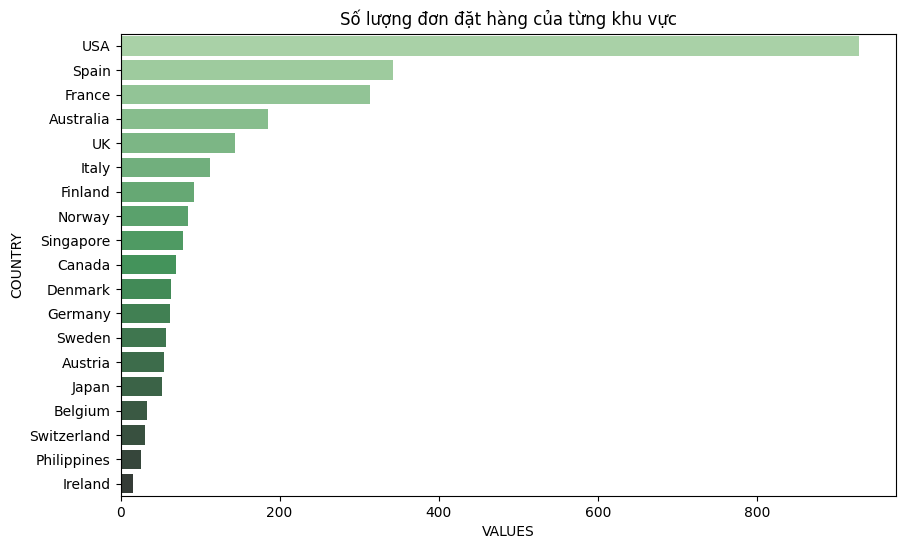

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_country, x= df_country['VALUES'], y=df_country['COUNTRY'], palette = "Greens_d")
plt.title('Số lượng đơn đặt hàng của từng khu vực')
# Sắp xếp lại

Số lượng đơn đặt hàng tại khu vực USA là cao nhất thậm chí có cách biệt rất lớn với các khu vực khác, đúng thứ hai là Spain và đứng thứ ba về số lượng đơn đặt hàng là France

Text(0.5, 1.0, 'Biểu đồ so sánh mức chi tiêu của từng khu vực')

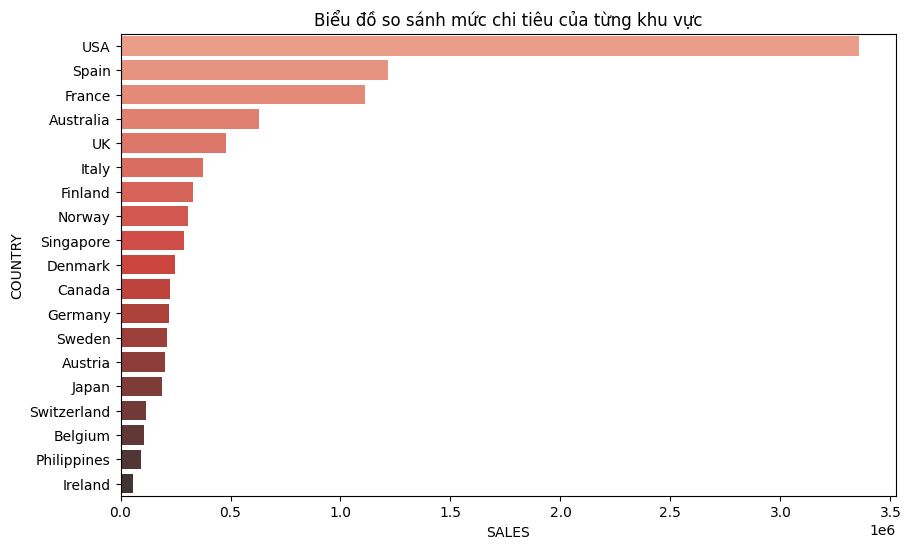

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_country_sales, x= df_country_sales['SALES'], y=df_country_sales['COUNTRY'], palette = "Reds_d")
plt.ylabel('COUNTRY')
plt.title("Biểu đồ so sánh mức chi tiêu của từng khu vực")

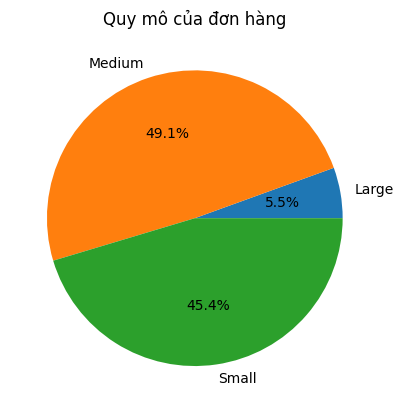

In [ ]:
plt.pie(so_luong, labels = lbls,autopct = '%1.1f%%')
plt.title('Quy mô của đơn hàng')
plt.show()
#lbls.value.tolist()
# Thêm 1 biểu đồ về giá trị của các qui mô đơn hàng

Text(0.5, 1.0, 'Biểu đồ phân phối tổng giá trị của một đơn hàng')

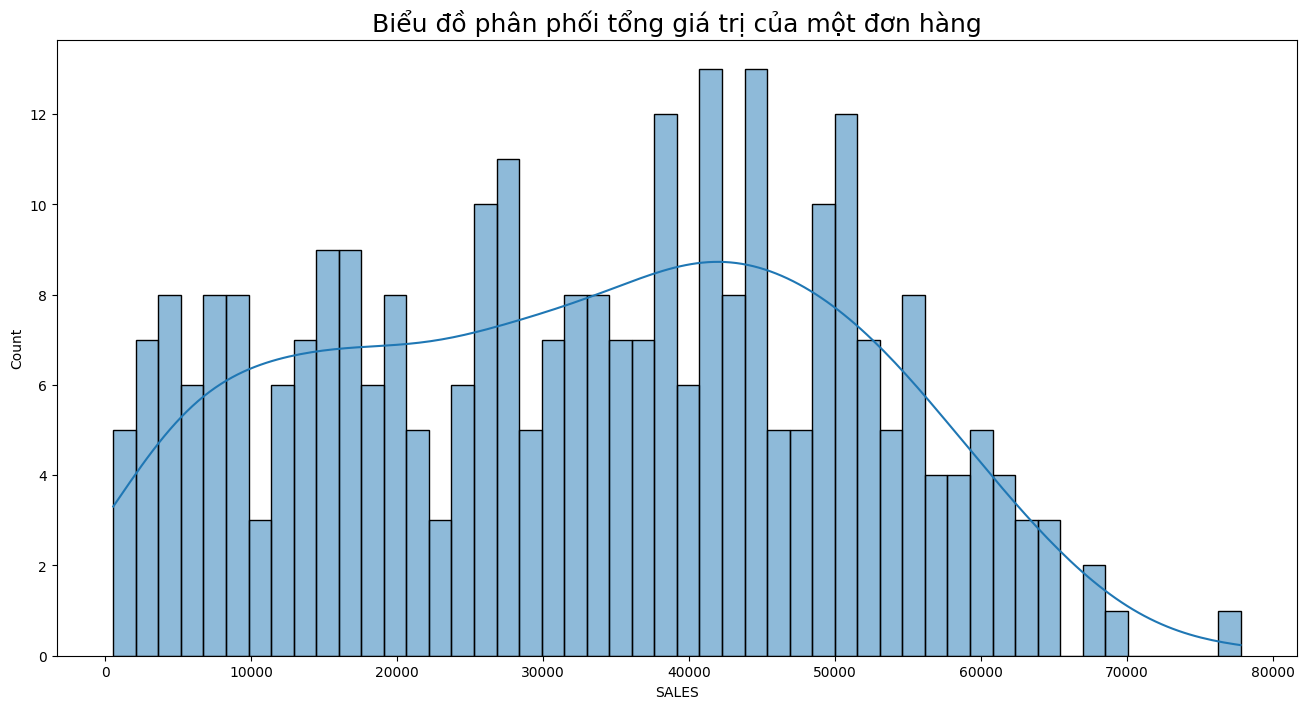

In [ ]:
plt.figure(figsize=(16, 8))
sns.histplot(x='SALES', data = df_ordernumber_value, bins=50, kde=True)
plt.title("Biểu đồ phân phối tổng giá trị của một đơn hàng", fontsize=18)

Phần lớn tổng giá trị của đơn hàng giao động từ 40000 đến hơn 50000 thuộc quy mô đơn hàng medium

<Axes: >

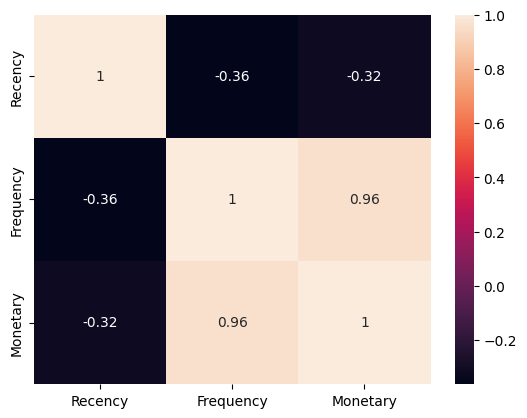

In [ ]:
sns.heatmap(df_rfm.corr(), annot=True)

<Axes: xlabel='Recency', ylabel='Density'>

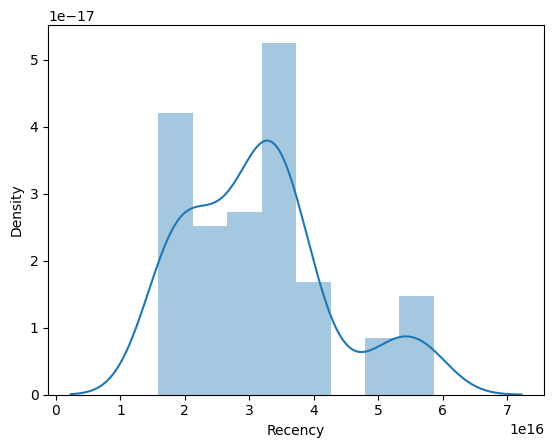

In [ ]:
sns.distplot(df_rfm['Recency'])

<Axes: xlabel='Frequency', ylabel='Density'>

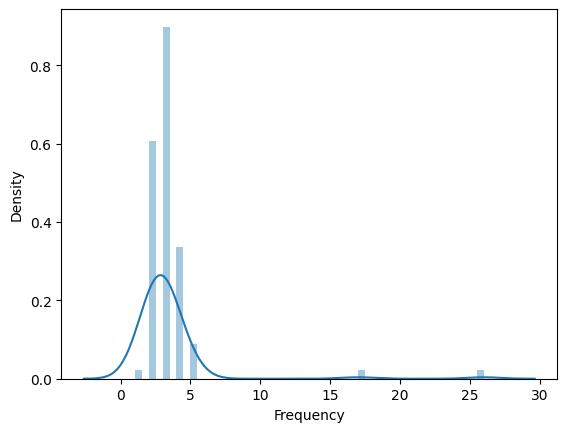

In [ ]:
sns.distplot(df_rfm['Frequency'])

<Axes: xlabel='Monetary', ylabel='Density'>

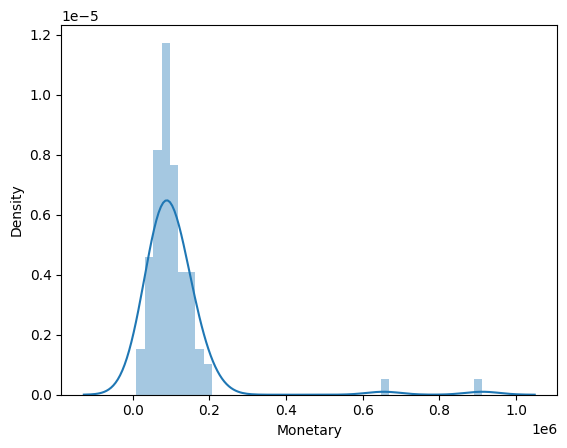

In [ ]:
sns.distplot(df_rfm['Monetary'])

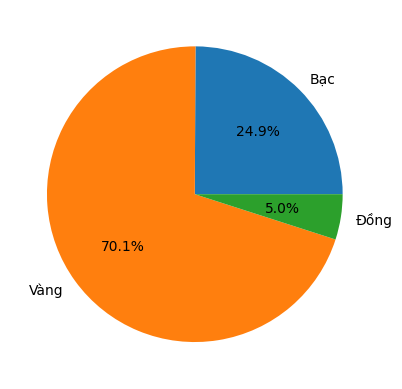

In [ ]:
labels = df_segment['Label'].values.tolist()
sl = df_segment['RFM_SCORE'].values.tolist()
plt.pie(sl, labels = labels, autopct = '%1.1f%%')
plt.show()
# Chia thành các phân khúc nhỏ hơn

# ACT

Dựa trên kết quả đã phân tích đưa ra các giải pháp cho doanh nghiệp

* **Khuyến nghị dành cho các khách hàng hạng vàng:** Đây là nhóm khách hàng trung thành của doanh nghiệp: tập trung gia tăng lượng mua của khách hàng, có thể đưa ra các chương trình tích điểm đổi voucher, bán theo combo giá hời, chương trình khách hàng thân thiết.
* **Khuyến nghị dành cho các khách hàng bạc:** Ở nhóm khách hàng này tần suất mua hàng không cao và giá trị đơn hàng cũng không quá lớn, doanh nghiệp có thể tập trung vào việc giữ chân nhóm khách hàng này và cải thiện mối quan hệ với nhóm khách hàng này bằng cách hỏi thăm về chất lượng sản phẩm, sản phẩm có còn hoạt động tốt hay không, gửi các email marketing về các sản phẩm mới, các chương trình ưu đãi.
* **Khuyến nghị dành cho các khách hàng đồng:** Nhóm khách hàng này tần suất mua hàng thấp và thời gian kể từ ngày mua hàng gần nhất lớn, đây là nhóm khách hàng có nguy cơ rời bỏ cao. Ở nhóm khách hàng này doanh nghiệp có thể tiến hành chiến lược Remarketing, nâng cao nhận thức của khách hàng về doanh nghiệp, cần đề cao lòng tin của khách hàng, và tạo hình ảnh thương hiệu trong lòng khách hàng.